In [1]:
import sys
sys.path.append("./../")
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
import numpy as np
import zeus
print('zeus version:', zeus.__version__)

zeus version: 0.9.9


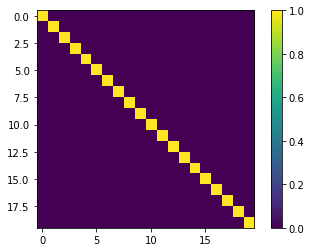

In [2]:
ndim = 20
nwalkers = 2 * ndim #* 2
nsteps= 1000

#C = make_spd_matrix(ndim)
C = np.identity(ndim)
plt.imshow(C)
plt.colorbar()

icov = np.linalg.inv(C)

#mu = np.random.rand(ndim) * 10.0
mu  = np.zeros(ndim)

def logp(x, mu, icov):
    return -0.5 * np.dot(np.dot((x-mu).T,icov),(x-mu))

#start = np.random.rand(ndim)
start = mu + 1.0 * np.random.randn(nwalkers,ndim)

In [ ]:
ndim = 16
nwalkers = 2 * ndim #* 2
nsteps= int(100000 / nwalkers)

def logp(x):
    a = 1.0
    b = 0.5
    first = -0.5*(x[0]**2.0 / a**2.0) - 0.5 * np.log(2.0 * np.pi) - np.log(a)
    rest = -0.5*np.sum(x[1:]**2.0 / np.exp(2*b*x[0])) -0.5*np.log(2.0 *np.pi) - (ndim-1) * b * x[0]
    return first + rest

start =np.random.randn(nwalkers,ndim)

In [ ]:
ndim = 2
nwalkers = 2*ndim*2
nsteps= 10000

def logp(x):
    return -100*(x[1]-x[0]**2.0)**2.0 - (1-x[0])**2.0

start = np.random.randn(nwalkers,ndim)

In [ ]:
def logp(x):
    return -np.sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1.0-x[:-1])**2.0)

In [ ]:
from multiprocessing import Pool

with Pool() as pool:
    sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov], pool=pool)
    sampler.run(start, nsteps)

In [3]:
#sampler = zeus.sampler(logp, nwalkers, ndim, jump=0.0)
sampler = zeus.sampler(logp, nwalkers, ndim, args=[mu, icov], jump=0.0, mu=10.0, tune=True)
sampler.run(start, nsteps)

Initialising ensemble of 40 walkers...
Sampling progress :   9%|▉         | 89/1000 [00:00<00:02, 414.58it/s]

0.2554517133956386
0.32432432432432434
0.3590733590733591
0.4009216589861751
0.44036697247706424
0.40825688073394495
0.4816753926701571
0.4423963133640553
0.49504950495049505
0.49514563106796117
0.5187165775401069
0.45893719806763283
0.4975369458128079


Sampling progress : 100%|██████████| 1000/1000 [00:01<00:00, 539.67it/s]


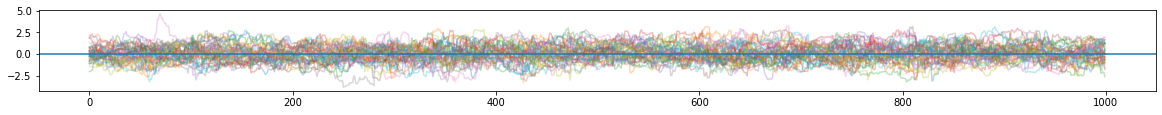

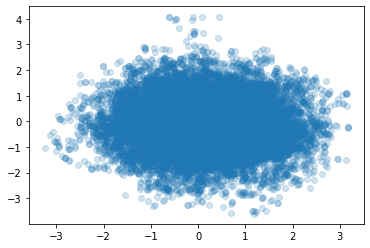

Summary
-------
Number of Generations: 1000
Number of Parameters: 20
Number of Walkers: 40
Mean Integrated Autocorrelation Time: 24.97
Effective Sample Size: 1602.05
Number of Log Probability Evaluations: 199820.0
Effective Samples per Log Probability Evaluation: 0.008017


MCMC mean: [ 0.11385653 -0.09009766 -0.0712115   0.03444214  0.00380679 -0.02204414
 -0.06070767  0.02543717  0.00464344  0.02077135  0.07170001  0.09101852
  0.0339965   0.02798295 -0.02573648  0.01402885  0.08686206 -0.03682357
 -0.04502954 -0.00772041]
TRUE mean: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
MCMC std: [0.96819418 0.96903753 1.02521757 1.03536114 1.00682034 1.03942145
 1.01633957 1.02063991 0.98631053 1.04165194 0.99138906 1.00182038
 0.9916103  1.02530923 1.03036689 1.00374779 0.97406784 1.02120539
 0.97913257 0.97974248]
TRUE std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [4]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(1):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(np.arange(nsteps),sampler.chain[:,:,n].T,alpha=0.3)
    plt.axhline(y=mu[n])
plt.tight_layout()
plt.show()

trace = sampler.flatten(burn=int(nsteps/2))
plt.scatter(trace[:,0],trace[:,1], alpha=0.2)
plt.show()

print('MCMC mean:', np.mean(trace, axis=0))
print('TRUE mean:', mu)
print('MCMC std:', np.std(trace, axis=0))
print('TRUE std:', np.sqrt(np.diag(C)))

sampler.summary

In [5]:
sampler.efficiency

0.00801744327360835

In [6]:
sampler.mu

1.0867396331597772

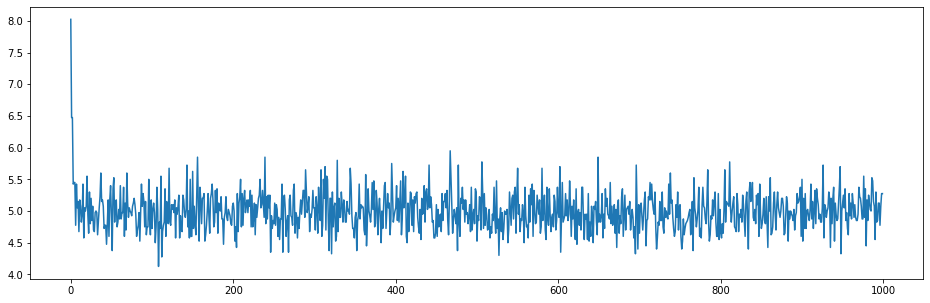

In [7]:
plt.figure(figsize=(16,5))
plt.plot(np.arange(nsteps),sampler.neval/nwalkers)
plt.show()

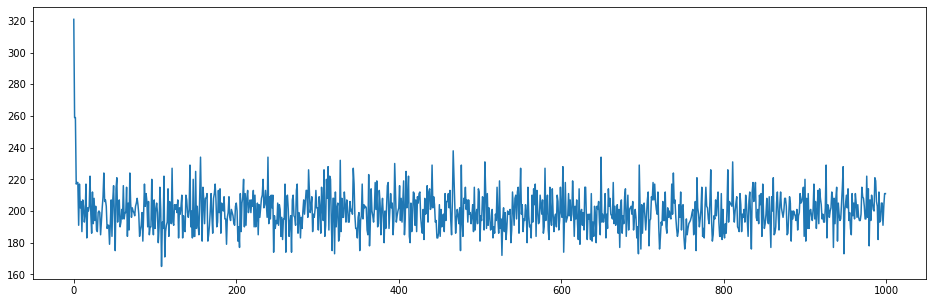

In [8]:
plt.figure(figsize=(16,5))
plt.plot(np.arange(nsteps),sampler.neval)
plt.show()

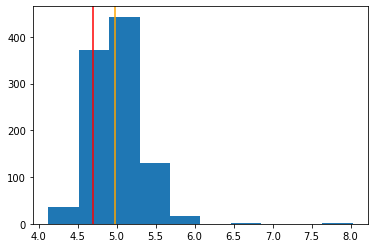

4.9755
4.695969590205287


In [9]:
mean_mu = np.mean(sampler.neval[int(nsteps/2):]/nwalkers)
std_mu = np.std(sampler.neval[int(nsteps/2):]/nwalkers)

plt.hist(sampler.neval/nwalkers)
plt.axvline(x=mean_mu, color='orange')
plt.axvline(x=mean_mu - std_mu, color='red')
plt.show()

print(mean_mu)
print(mean_mu - std_mu)

In [10]:
np.mean(sampler.neval[-10:]/nwalkers)

5.0175

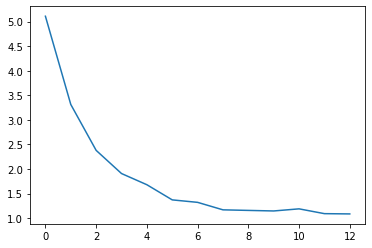

In [11]:
plt.plot(np.arange(len(sampler.mus)),sampler.mus)
plt.show()

In [12]:
sampler.mus

[5.109034267912772,
 3.313968173781258,
 2.379915368043683,
 1.9083192352055338,
 1.6807215282544152,
 1.3723322570150729,
 1.3220373575433164,
 1.1697289062134413,
 1.1581474318944962,
 1.1469032820702778,
 1.1898354904900208,
 1.0921195323338355,
 1.0867396331597772]